<a href="https://colab.research.google.com/github/chavamoon/MachineLearningExamples/blob/main/Python/Regression/ElasticNetRegression_Desempleo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Descripción**: 

En un estudio de 50 personas se obtuvieron datos de variables que pueden estar relacionadas con el número de semanas que está desempleado un trabajador de la industria manugfacturera.

La varaible dependiente de estudio **(weeks_unemployed)** se definió como el número de semanas que un emplemado está desempleado debido a un despido.

En este estudio se usaron las siguientes variables independiente:

* age: Edad del trabajador
* education_years: Número de anios de estudio
* married: Si está casado o no
* head_of_family: Si es cabeza de familia.
* years_of_prev_work: Número de años en el trabajo anterior.
* manager: Si su ocupación es en administración
* sales: Si su ocupación es en ventas

# **1. CARGA DE DATOS**

In [3]:
# Random seed for making the experiment reproducible 
np.random.seed(200728)

In [4]:
desempleo_dataset = pd.read_csv("datos_desempleo.csv")


# **2. EDA**

In [5]:
desempleo_dataset.head()

,weeks_unemployed,age,education_years,married,head_of_family,years_of_prev_work,manager,sales
0,37,30,14,1,1,1,0,0
1,62,27,14,1,0,6,0,0
2,49,32,10,0,1,11,0,0
3,73,44,11,1,0,2,0,0
4,8,21,14,1,1,2,0,0


In [6]:
desempleo_dataset.shape

(45, 8)

In [7]:
desempleo_dataset.describe()

,weeks_unemployed,age,education_years,married,head_of_family,years_of_prev_work,manager,sales
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,46.733333,34.911111,13.266667,0.711111,0.711111,8.666667,0.088889,0.177778
std,22.404748,9.282981,2.605937,0.458368,0.458368,6.007571,0.287799,0.386646
min,8.000000,20.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,28.000000,12.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,44.000000,33.000000,13.000000,1.000000,1.000000,8.000000,0.000000,0.000000
75%,62.000000,40.000000,15.000000,1.000000,1.000000,11.000000,0.000000,0.000000
max,98.000000,62.000000,18.000000,1.000000,1.000000,30.000000,1.000000,1.000000


Revisar correlación entre variables

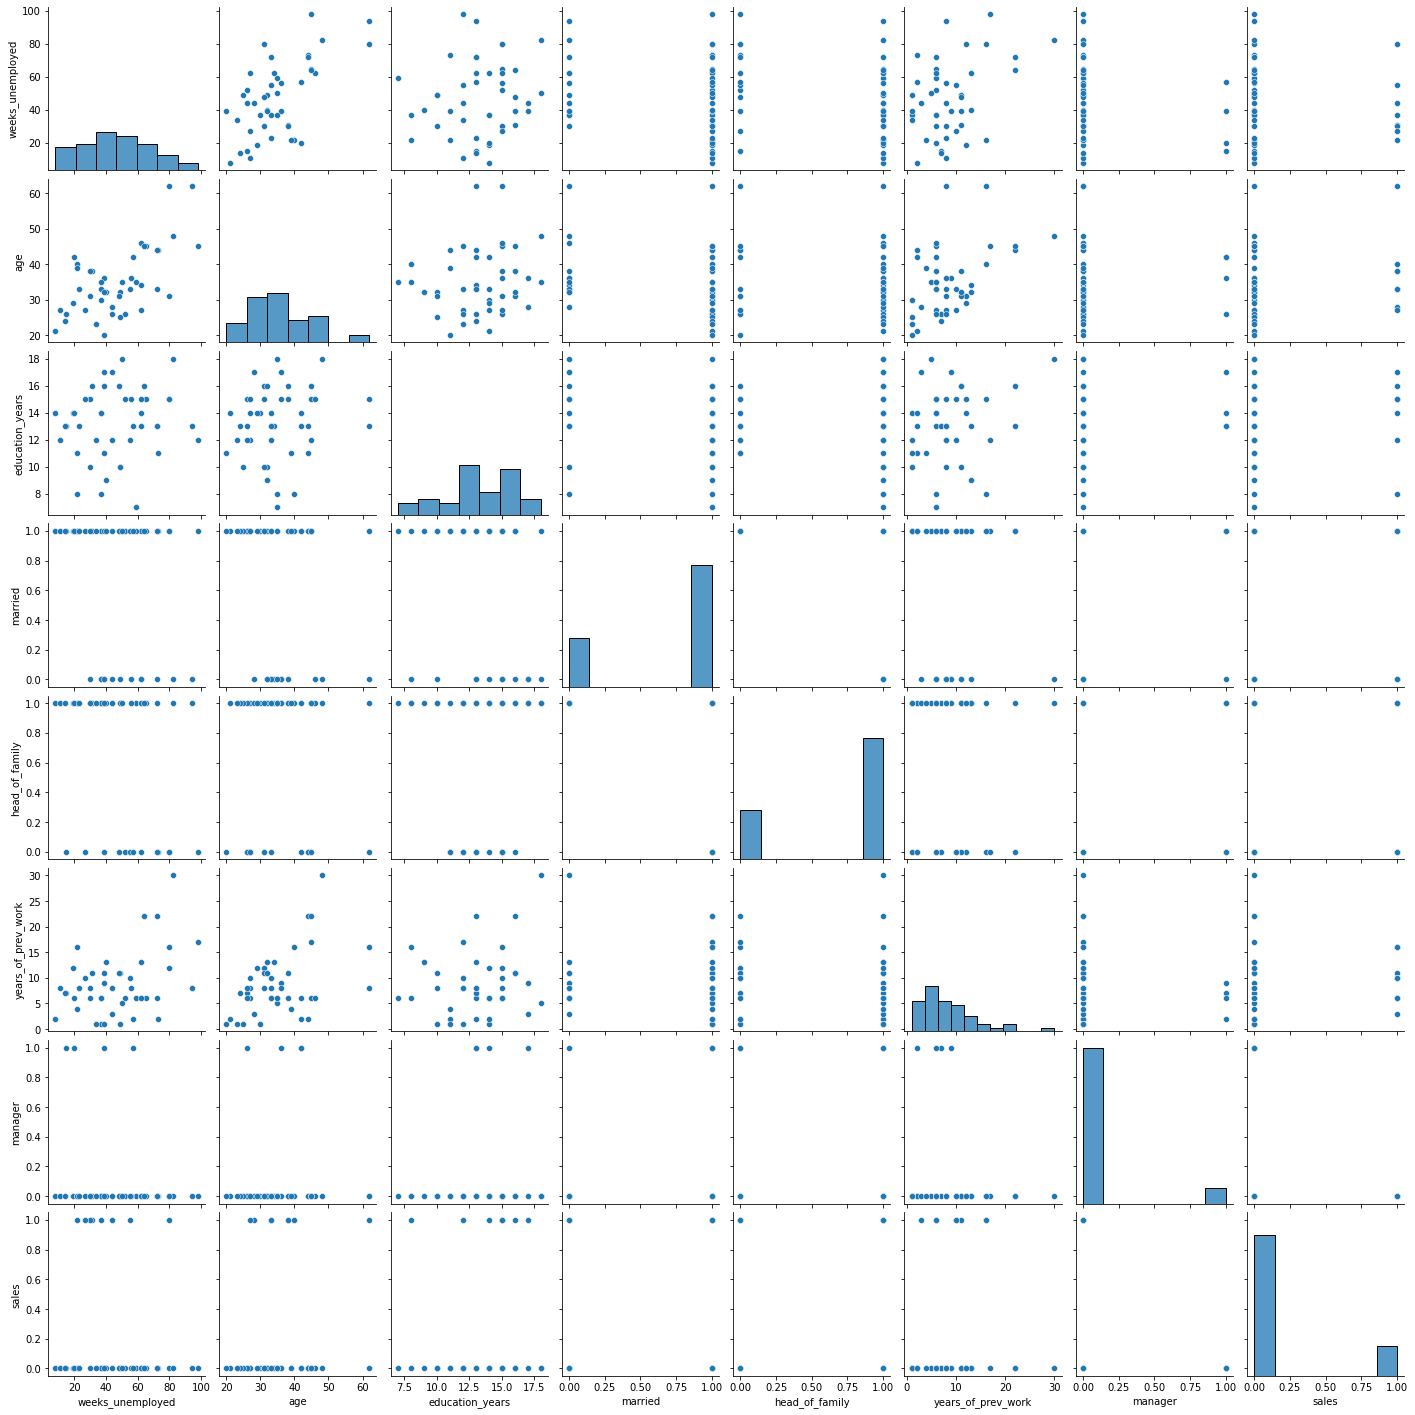

In [9]:
#checking correlation between variables
sns.pairplot(desempleo_dataset)

In [10]:
#Correlation matrix
desempleo_dataset.corr()

,weeks_unemployed,age,education_years,married,head_of_family,years_of_prev_work,manager,sales
weeks_unemployed,1.000000,0.613680,0.140602,-0.211273,-0.332992,0.370463,-0.197146,-0.125582
age,0.613680,1.000000,0.147564,-0.209141,-0.022196,0.448964,0.054066,0.124812
education_years,0.140602,0.147564,1.000000,-0.219444,-0.048202,0.204693,0.119194,0.132331
married,-0.211273,-0.209141,-0.219444,1.000000,-0.406250,-0.085285,0.026800,-0.088342
head_of_family,-0.332992,-0.022196,-0.048202,-0.406250,1.000000,-0.077032,-0.145484,-0.088342
years_of_prev_work,0.370463,0.448964,0.204693,-0.085285,-0.077032,1.000000,-0.140213,0.084798
manager,-0.197146,0.054066,0.119194,0.026800,-0.145484,-0.140213,1.000000,-0.145239
sales,-0.125582,0.124812,0.132331,-0.088342,-0.088342,0.084798,-0.145239,1.000000


Insuline and bmi are the best candidates for predicting glucose, in this example we will use bmi to predict glucose

In [22]:
X = desempleo_dataset[['age', 'education_years', 'married', 'head_of_family', 'years_of_prev_work', 'manager', 'sales']]
y = desempleo_dataset[['weeks_unemployed']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
print("Shape of X_train: " , X_train.shape, ". Shape of X_test" , X_test.shape)

Shape of X_train:  (31, 7) . Shape of X_test (14, 7)


In [17]:
print("Shape of y_train: " , y_train.shape, ". Shape of y_test" , y_test.shape)

Shape of y_train:  (31, 1) . Shape of y_test (14, 1)


# **3. ENTRENAMIENTO**

In [19]:
lr = ElasticNetCV()

In [23]:
# Send training values to LinearRegression
m_lr = lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Getting betas and intercept

In [24]:
# Betas
m_lr.coef_

array([ 1.33470991,  0.7357316 , -3.56033873, -8.72444089,  0.23622775,
       -9.16565002, -8.31912395])

In [25]:
#Intercept
m_lr.intercept_

0.578995286619552

# **4. Predicciones**

In [26]:
predictions = m_lr.predict(X_test)

In [27]:
#last_five predictions
predictions[:5]

array([38.87198316, 43.93601634, 41.57655026, 49.38586081, 49.87016289])

**4. PERFORMANCE METRICS**

In [28]:
#MAE
mean_absolute_error(y_test, predictions)

12.750307394656074

In [29]:
#RMSE
mean_squared_error(y_test, predictions, squared=False)

15.200997242387372

**5.RESIDUALS**

In [34]:
residuals = y_test.weeks_unemployed - predictions

In [39]:
 # predictions to 231 single array
df_residuals = pd.DataFrame({'y_test': y_test['weeks_unemployed'], 'predictions': predictions, 'residuals': residuals})


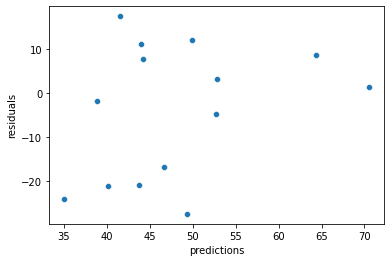

In [40]:
#Dots should be centered in zero and have constants variance (no pattern)
sns.scatterplot(x="predictions", y="residuals", data=df_residuals)

**5. QQPLOT**

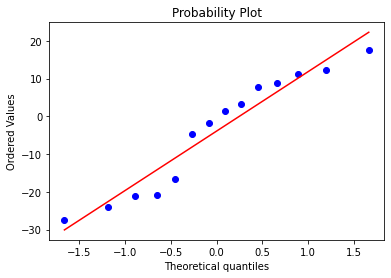

In [41]:
# Must follow 45 degrees line
stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()